# EDA




# Train DataSet

Датасет состоит из 31.072 изображений (сэмплов), каждому соответсвуют 4 канала-фильтра: red, green, blue и yellow. На изображениях присутсвуют метки месторасположения различных структур (органелл) белка. Всего в наборе данных присутсвуют 28 классов органелл белка, которые необходимо предсказать.


### 1. Частотность лейблов в train 

Рассмотрим частостность встречаемости лейблов в наборе ланных 

<img src="newplot.png">

* Исходя из графика, предсавленного ниже, можно сделать вывод, что чаще всего встречаются Nucleoplasm, Cytosol и Plasma membrane. Скорее всего, будущая модель научится хорошо предсказывать данные классы, потому что они хорошо представленны в выборке.

* Такие лейблы как Peroxisomes, Endosomes, Lysosomes and etc. очень редко встречаются в трейне ( меньше 100 примеров). Предсказывать такие классы будет очень сложно. При обученнии необходимо будет обратить особое внимание к данным классам. Например, при обучении ввести class_weights, или насэмплить еще примеров с данными классами.



### 2. Количество классов на изображении

В большинстве сэмплах присутсвует либо один класс, либо представленно два класса. Очень редко встречаются больше чем три класса на изображении.  

<img src="newplot_1.png">





### 3. Связь между лейблами 

*  Классы Endosomes и Lysosomes встречаются очень часто. Также вместе с ними иногда присутсвует Endoplasmic reticulum.

Это объясняется тем, что при образовании лизосом учавствуют эндосомы (пузырьки), вблизи ( на поверхности) мембран эндоплазматического ретикулума

* У классов Cytokinetic bridge и Mitotic spindle; Cytokinetic bridge и Microtubles наблюдается небольшая положительная корреляция.







<img src="protein-correlation.png">

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from scipy.misc import imread

import pickle

import tensorflow as tf
sns.set()

import os



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
train_labels = pd.read_csv("../ceph-data/kaggle-protein/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [4]:
train_labels.shape

(31072, 2)

In [5]:
pickle_in = open("dict_labels.pickle","rb")
label_names = pickle.load(pickle_in)

In [6]:
reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [7]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0
    

In [8]:
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head(2)

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
count_labels = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)


In [11]:
df_labels = pd.DataFrame(count_labels).reset_index()
df_labels.rename(columns={"index":"Name", 0:"counts"}, inplace=True)

### 1. Частотность лейблов в трейне 

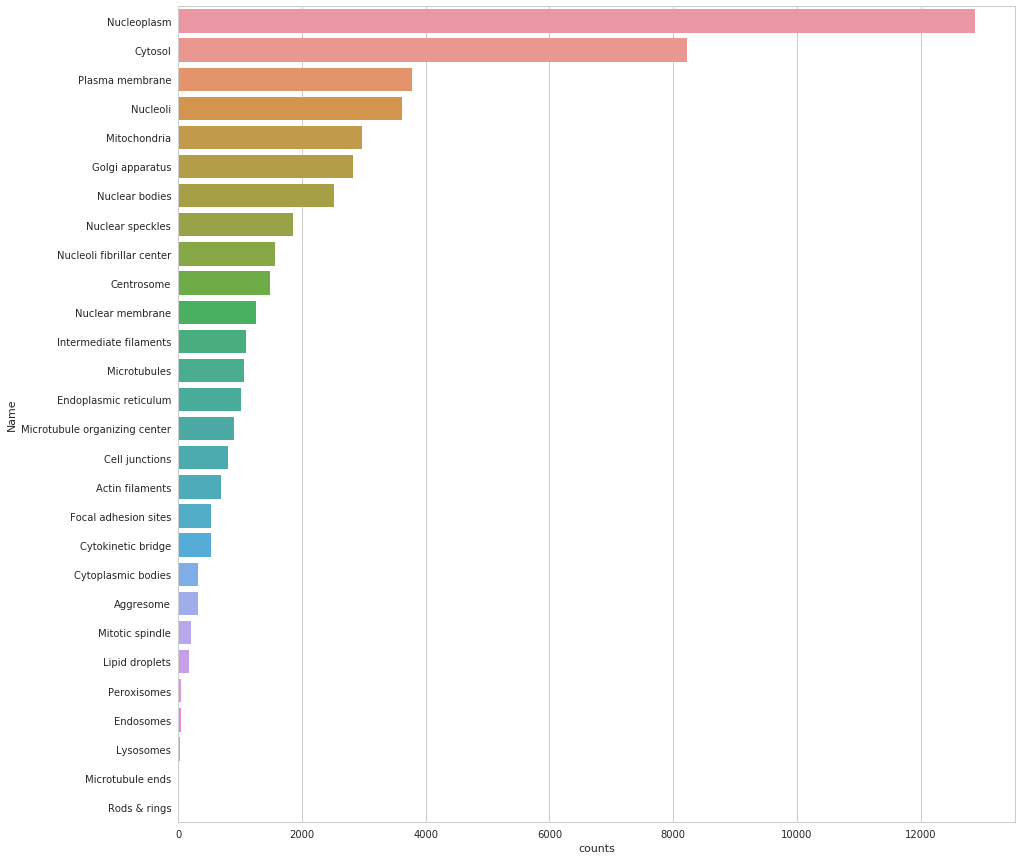

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15,15))
ax = sns.barplot(x="counts", y="Name", data=df_labels)

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
py.sign_in('Panamka', 'Xri9H3CiQvu3KNoZq2jp')

### 2. Сколько лейблов встречаются на изображении 

In [93]:
train_labels['all_target']= train_labels.Target.apply(lambda x: len(x))
label_value = train_labels[['Id', 'all_target']].groupby('all_target').count()

In [99]:
label_value.reset_index(inplace=True)

### 3. Корреляция между классами 

In [148]:
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)

In [149]:
z=train_labels[train_labels.number_of_targets>1].drop(["Id", "Target", "number_of_targets"],axis=1).corr()

In [ ]:
train_path = "../ceph-data/kaggle-protein/train.csv/"

In [7]:
TRAIN = '../ceph-data/kaggle-protein/train/'
TEST = '../ceph-data/kaggle-protein/test/'

LABELS = '../ceph-data/kaggle-protein/train.csv'
SAMPLE = '../ceph-data/kaggle-protein/sample_submission.csv'

In [158]:
train_names = list({f[:36] for f in os.listdir(TRAIN)})
test_names = list({f[:36] for f in os.listdir(TEST)})
tr_n, val_n = train_test_split(train_names, test_size=0.1, random_state=42)

NameError: name 'train_test_split' is not defined

# 4. Load data 

In [19]:
from os import listdir

files = listdir("../ceph-data/kaggle-protein/train")
for n in range(10):
    print(files[n])

f3db54f0-bbae-11e8-b2ba-ac1f6b6435d0_green.png
3428e490-bb9c-11e8-b2b9-ac1f6b6435d0_red.png
d3dcc7ee-bbac-11e8-b2ba-ac1f6b6435d0_green.png
b55bda66-bba8-11e8-b2ba-ac1f6b6435d0_green.png
f21b2d8e-bbbd-11e8-b2ba-ac1f6b6435d0_yellow.png
fc7a16aa-bba9-11e8-b2ba-ac1f6b6435d0_blue.png
0419ecaa-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
151715cc-bba6-11e8-b2ba-ac1f6b6435d0_green.png
3ad2d756-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
0c3fc23e-bba4-11e8-b2b9-ac1f6b6435d0_red.png


In [20]:
train_labels.shape[0]

31072